In [15]:
import pandas as pd
import ast 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data_jobs.csv")
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [16]:
df_IN = df[(df['job_country'] == 'India')].dropna(subset=['salary_year_avg'])

In [17]:
job_titles = df_IN['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

In [18]:
df_IN_top6 = df_IN[df_IN['job_title_short'].isin(job_titles)]

job_order = df_IN_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index



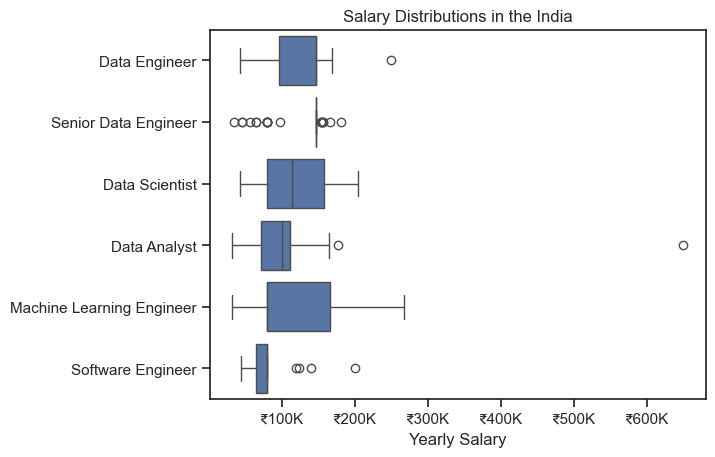

In [19]:
sns.boxplot(data=df_IN_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title("Salary Distributions in the India")
plt.xlabel("Yearly Salary")
plt.ylabel('')
# plt.xlim(0, 1500000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'₹{int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [20]:
df_DA_IN = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

In [21]:
df_DA_IN = df_DA_IN.dropna(subset=['salary_year_avg'])

In [22]:
df_DA_IN = df_DA_IN.explode('job_skills')
df_DA_IN[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


In [23]:
df_DA_top_pay = df_DA_IN.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

In [24]:
df_DA_top_pay = df_DA_top_pay.head(10)

In [25]:
df_DA_skills = df_DA_IN.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

In [26]:
df_DA_skills = df_DA_skills.head(10)

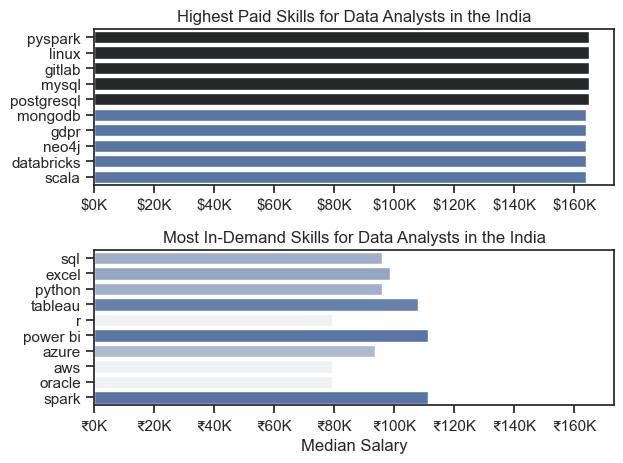

In [27]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Highest Paid Skills for Data Analysts in the India')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in the India')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'₹{int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()